In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
#Image settings
IMG_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 10
DATASET_PATH = 'Leaf_Images/'

#Image scaling options
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

#Training generator initialization setup
train_gen = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

#Validation generator
val_gen = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 3601 images belonging to 3 classes.
Found 899 images belonging to 3 classes.


In [3]:
#Building the CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\etb9\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,363 (56.61 MB)

 Trainable params: 14,839,363 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
#Train the new CNN Model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[EarlyStopping(patience=3)]
)

C:\Users\etb9\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 112s 979ms/step - accuracy: 0.5001 - loss: 1.2497 - val_accuracy: 0.8621 - val_loss: 0.3322
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 81s 710ms/step - accuracy: 0.8640 - loss: 0.3295 - val_accuracy: 0.8999 - val_loss: 0.2479
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 80s 706ms/step - accuracy: 0.9052 - loss: 0.2354 - val_accuracy: 0.9032 - val_loss: 0.2296
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 80s 706ms/step - accuracy: 0.9085 - loss: 0.2229 - val_accuracy: 0.8710 - val_loss: 0.2953
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 80s 706ms/step - accuracy: 0.8990 - loss: 0.2509 - val_accuracy: 0.9455 - val_loss: 0.1360
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 80s 707ms/step - accuracy: 0.9178 - loss: 0.1910 - val_accuracy: 0.9377 - val_loss: 0.1516
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 80s 709ms/step - accuracy: 0.9362 - loss: 0.1551 - val_accuracy: 0.9032 - val_loss: 0.2623
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 89s 786ms/step - accuracy: 0.9338 - loss: 

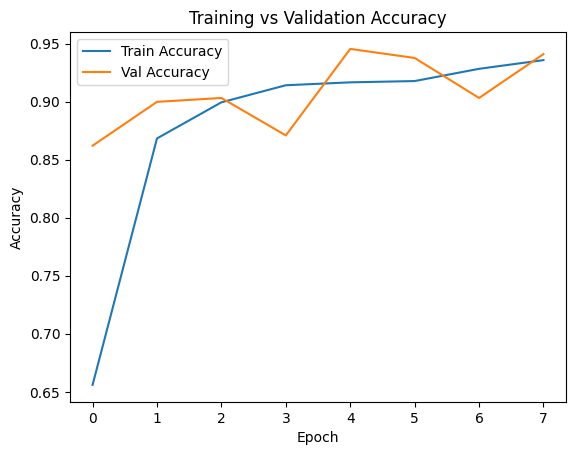

In [5]:
#This section will plot the training performance
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [6]:
#Save the model so I can continue to utilize it
model.save("leaf_disease_model.h5")

In [8]:
#Test out my model on a test leaf image
img_path = 'testleaf.jpg'  # replace this with your actual test image
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

loaded_model = load_model("leaf_disease_model.h5")
prediction = loaded_model.predict(img_array)

class_indices = train_gen.class_indices
index_to_class = {v: k for k, v in class_indices.items()}
predicted_label = index_to_class[np.argmax(prediction)]

print(f"Predicted Disease: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Predicted Disease: Tomato_healthy
